In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d
import networkx as nx
import random

In [2]:
class Node:
    
    def __init__(self, node_id, depth = None, child = None, parent = None, loc = None):
        self.id = node_id
        self.depth = depth
        self.state = None
        self.children = child
        self.parent = parent
        self.location = loc

class Noisy_Tree:
    
    def __init__(self, seed_nodes):
        
        self.seed_nodes = seed_nodes
        self.size = len(seed_nodes)## seed nodes and the root node
        
        self.root = Node(-1)
        self.root.depth = 0
        self.root.location = (0,0,0)
        self.root.parent = None
        self.root.children = self.seed_nodes
        
        
        for j,e in enumerate(self.seed_nodes):
            e.depth = 1
            e.location = (e.depth, np.sin(e.id*(1/(self.size))*2*np.pi), np.cos(e.id*(1/(self.size)*2*np.pi)))
            e.parent = self.root
            e.children = None
            
        self.nodes = seed_nodes
        self.leaf = seed_nodes
        self.height = 1
        
    def make_tree(self, height, branching_constant):
        new_branch = []
        for i in range(height):
            node_id = 0
            self.leaf_update()
            for j,f in enumerate(self.leaf):
                node_id = j * branching_constant
                new_branch = [Node(node_id + k, 
                                   depth = self.height + 1 + i, 
                                   parent = f, 
                                   loc = (self.height + 1 + i, 
                                          np.sin((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi), 
                                          np.cos((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi)))  
                              for k in range(branching_constant)]
                
                f.children = new_branch
                self.nodes = self.nodes + new_branch
                
        self.size = len(self.nodes)
        self.height = self.height + height
        
        return(None)
        
    def leaf_update(self):
        leaves = []
        
        for i,e in enumerate(self.nodes):
            if e.children == None: leaves.append(e)
        self.leaf = leaves
        
        return(None)
    
    def get_generations(self, n):
        nth_generation = []
        for i,e in enumerate(self.nodes):
            if e.depth == n: nth_generation.append(e)
        return(nth_generation)
    
    def display_2d(self, ax):
        
        layer_colors = {'1':'r', '2':'b', '3':'g', '4':'black', '5':'purple', '6':'yellow'}
        gen = 0
        
        for i in range(self.size):
            if gen != self.nodes[i].location[0]:
                ax.scatter(self.nodes[i].location[0]*self.nodes[i].location[1],
                              self.nodes[i].location[0]*self.nodes[i].location[2], 
                              c =layer_colors['%d'%self.nodes[i].location[0]], 
                              label = 'Generation %d'%(self.nodes[i].location[0]), s = 10)
                gen = self.nodes[i].location[0] 
                
            else:ax.scatter(self.nodes[i].location[0]*self.nodes[i].location[1],
                              self.nodes[i].location[0]*self.nodes[i].location[2], 
                              c =layer_colors['%d'%self.nodes[i].location[0]], s = 10)
        
            ax.legend()
            
        ax.set_title('%d-Branching Tree of height %d'%(len(self.nodes[-1].parent.children),self.height))
        
    def display_3d(self, ax, edges = False):
        
        layer_colors = {'1':'r', '2':'b', '3':'g', '4':'black', '5':'purple', '6':'yellow'}

        
        for i in range(self.size):
            if self.nodes[i].depth == 1: radius = 1
            else: 
                if len(self.get_generations(self.nodes[i].depth))/len(self.get_generations(self.nodes[i].depth-1)) == 1:
                    radius = radius
                else:radius = self.nodes[i].depth
            ax.scatter(xs = radius*self.nodes[i].location[1], 
                       ys = radius*self.nodes[i].location[2],
                       zs = self.nodes[i].depth, 
                       s = 10, 
                       c = layer_colors['%d'%self.nodes[i].location[0]], 
                       depthshade = True)
        if edges:
            for h in range(1,self.height):
                for i,e in enumerate(self.get_generations(h)):
                    if e.depth == 1: radius_p = 1
                    else: 
                        if len(self.get_generations(e.depth))/len(self.get_generations(e.depth-1)) == 1:
                            radius_p = radius_p
                        else:radius_p = e.depth
                    
                    for j,f in enumerate(e.children):
                        if f.depth == 1: radius_c = 1
                        else: 
                            if len(self.get_generations(f.depth))/len(self.get_generations(f.depth-1)) == 1:
                                radius_c = radius_c
                            else:radius_c = f.depth

                        ax.plot([radius_p*e.location[1],radius_c*f.location[1]],
                                [radius_p*e.location[2],radius_c*f.location[2]],
                                [e.location[0],f.location[0]], 
                                c = 'r', 
                                alpha = 0.3)
            
        ax.set_title('%d-Branching Tree of height %d'%(len(self.nodes[-1].parent.children), self.height))
        
    def add_noise(self, layer, number):
        noisy_edges = []
        for i in range(number): 
            pair = random.sample(self.get_generations(layer),2)
            noisy_edges.append(pair)
        return(noisy_edges)
        

In [5]:
nodes = []
seed = 5
for j in range(seed):
    nodes.append(Node(j))

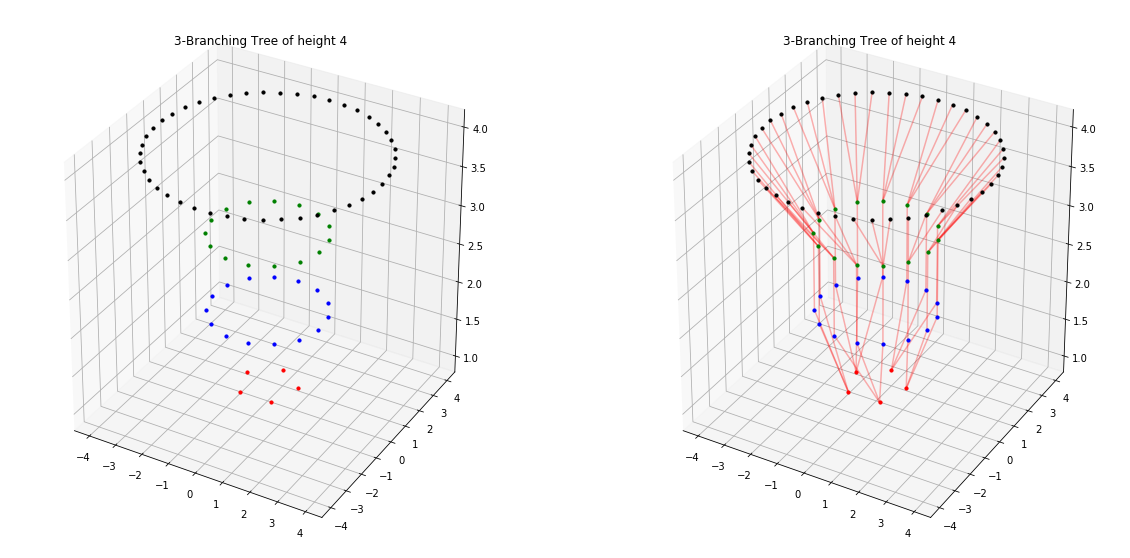

In [6]:
NT1 = Noisy_Tree(nodes)

NT1.make_tree(1,3)
NT1.make_tree(1,1)
NT1.make_tree(1,3)

fig = plt.figure(figsize = (20,10))
ax11 = fig.add_subplot(121, projection = '3d')
ax12 = fig.add_subplot(122, projection = '3d')

NT1.display_3d(ax = ax11, edges = False)
NT1.display_3d(ax = ax12, edges = True)

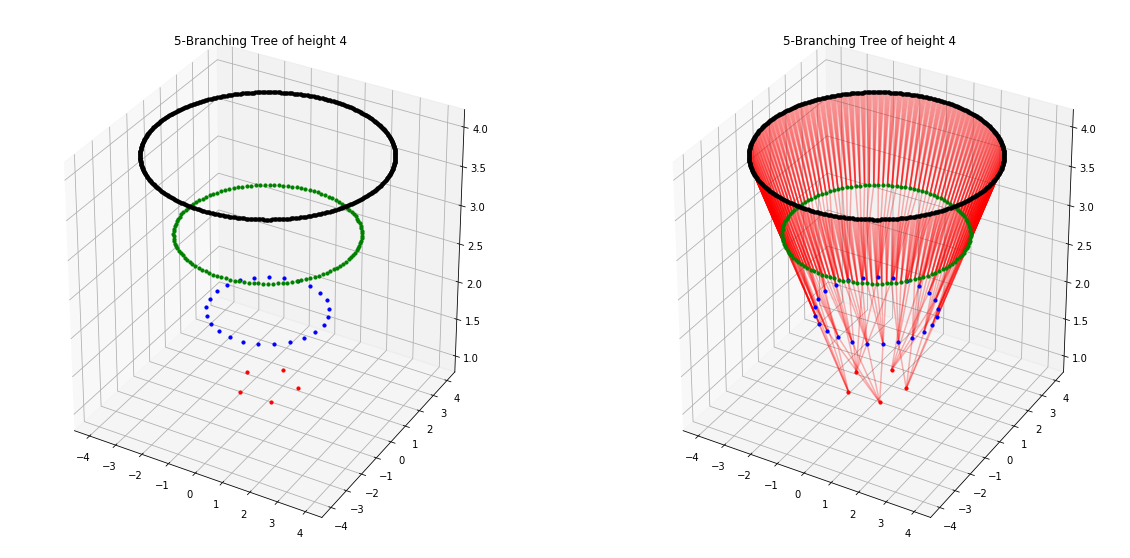

In [7]:
NT2 = Noisy_Tree(nodes)

NT2.make_tree(3,5)

fig = plt.figure(figsize = (20,10))
ax21 = fig.add_subplot(121, projection = '3d')
ax22 = fig.add_subplot(122, projection = '3d')

NT2.display_3d(ax = ax21, edges = False)
NT2.display_3d(ax = ax22, edges = True)

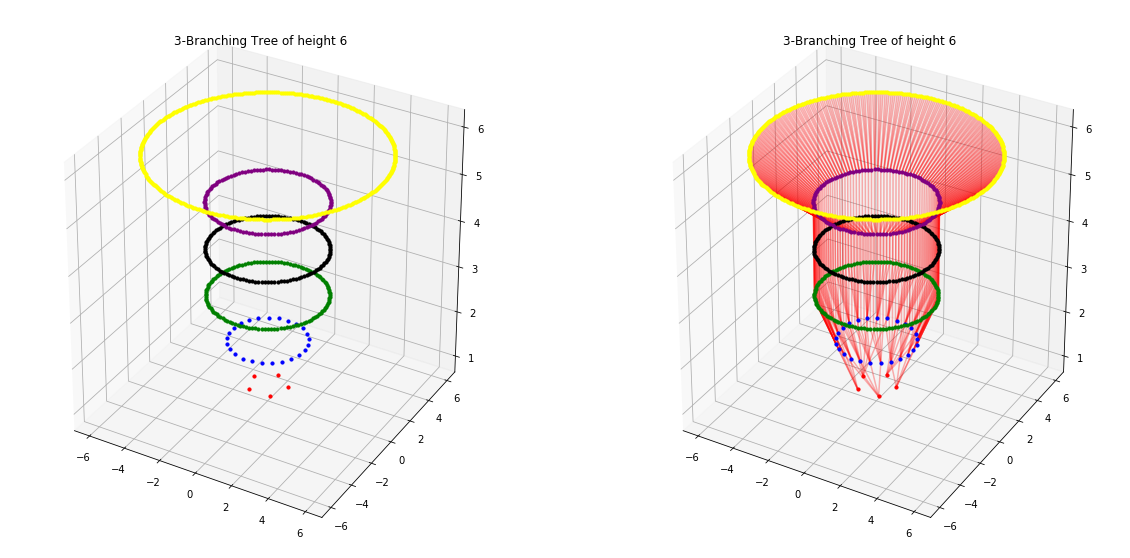

In [8]:
NT3 = Noisy_Tree(nodes)

NT3.make_tree(2,5)
NT3.make_tree(1,1)
NT3.make_tree(1,1)
NT3.make_tree(1,3)

fig = plt.figure(figsize = (20,10))
ax31 = fig.add_subplot(121, projection = '3d')
ax32 = fig.add_subplot(122, projection = '3d')

NT3.display_3d(ax = ax31, edges = False)
NT3.display_3d(ax = ax32, edges = True)

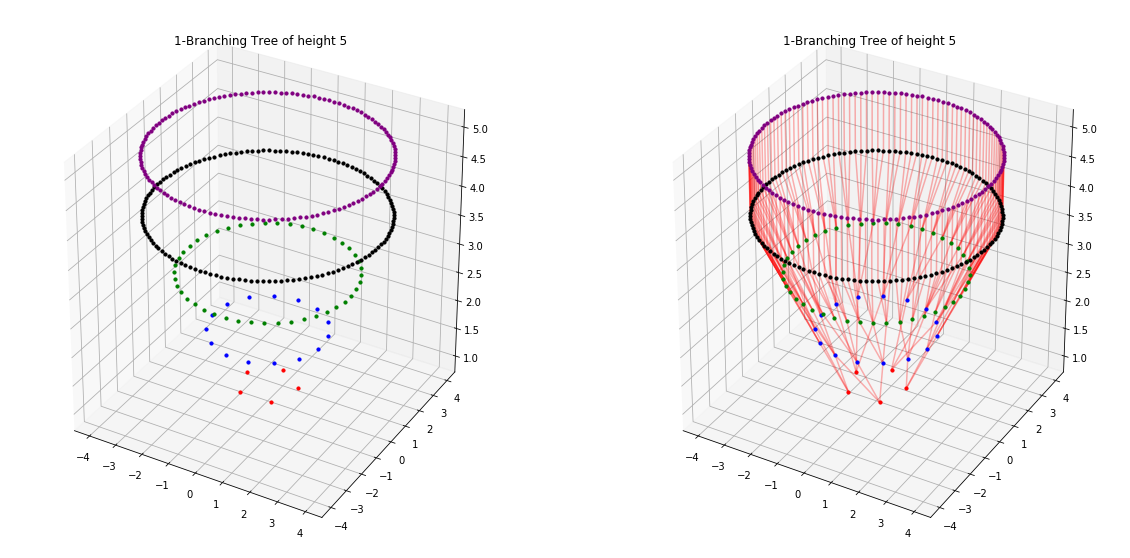

In [9]:
NT4 = Noisy_Tree(nodes)

NT4.make_tree(3,3)
NT4.make_tree(1,1)

fig = plt.figure(figsize = (20,10))
ax41 = fig.add_subplot(121, projection = '3d')
ax42 = fig.add_subplot(122, projection = '3d')


NT4.display_3d(ax = ax41, edges = False)
NT4.display_3d(ax = ax42, edges = True)

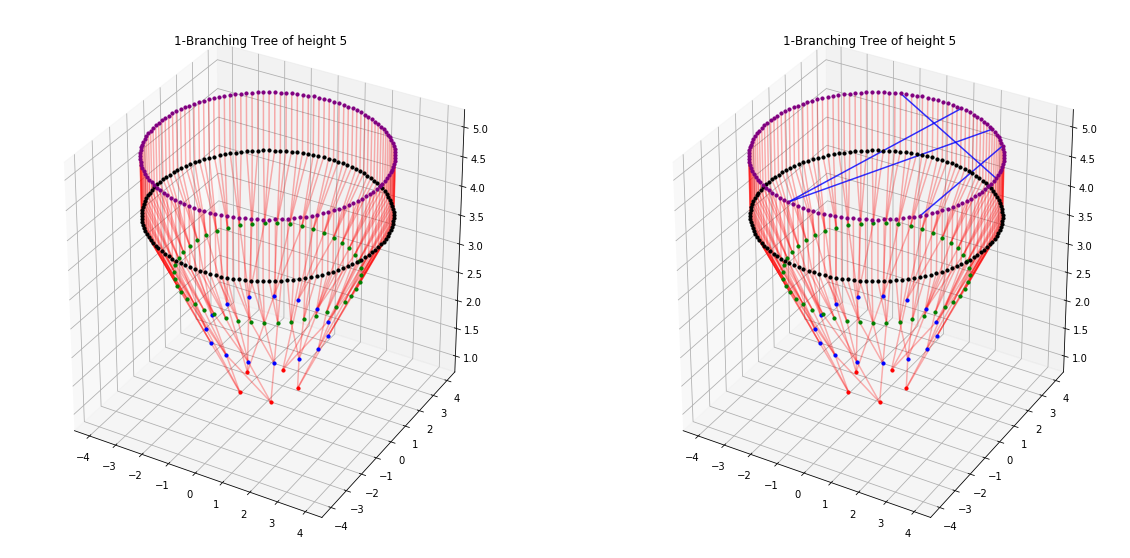

In [21]:
NT5 = Noisy_Tree(nodes)

NT5.make_tree(3,3)
NT5.make_tree(1,1)

fig = plt.figure(figsize = (20,10))
ax51 = fig.add_subplot(121, projection = '3d')
ax52 = fig.add_subplot(122, projection = '3d')


NT5.display_3d(ax = ax51, edges = True)
NT5.display_3d(ax = ax52, edges = True)

noise = NT5.add_noise(5,4)

for i,e in enumerate(noise):
    radius_p = e[0].depth - 1
    ax52.plot([radius_p*e[0].location[1],radius_p*e[1].location[1]],
            [radius_p*e[0].location[2],radius_p*e[1].location[2]],
            [e[0].location[0],e[1].location[0]], 
            c = 'b', 
            alpha = 0.8)

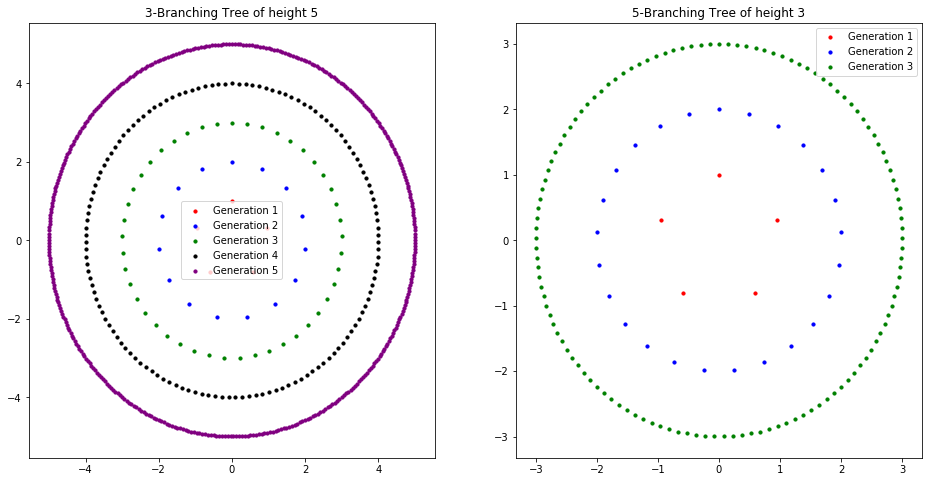

In [8]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
NT3.display_2d(ax = ax[0])
NT5.display_2d(ax = ax[1])
#plt.savefig('/Users/bengieru/Desktop/presentations/Network_Dynamics/2d_tree.pdf')

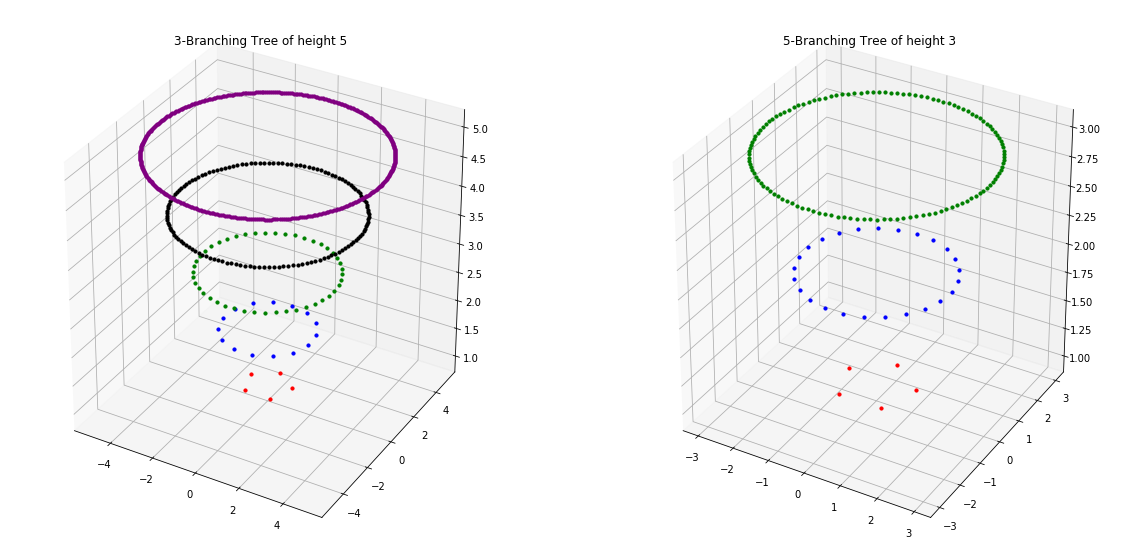

In [9]:
fig = plt.figure(figsize = (20,10))
ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')
NT3.display_3d(ax = ax0)
NT5.display_3d(ax = ax1)
plt.savefig('/Users/bengieru/Desktop/presentations/Network_Dynamics/3d_tree.pdf')